目前使用LOP為定義之實驗數據採用20筆，單變數

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn import preprocessing as pre
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection

In [2]:
# TIP = pd.read_csv(os.path.join("/root/LR_ML", "0507.xlsx"))
# TIP = pd.read_excel('0507.xlsx', index_col=None)
# TIP = pd.read_csv(os.path.join('/root/LR_ML', 'Data_Sorted.csv'), error_bad_lines=False)
# os.getcwd()

In [3]:
datafile = u"/root/LR_ML/FinalData2.xlsx"
TIP0 = pd.read_excel(datafile)

In [4]:
TIP = pd.DataFrame(TIP0).drop(['No pulse', 'LOP error'],axis=1)

In [5]:
# TIP.head()

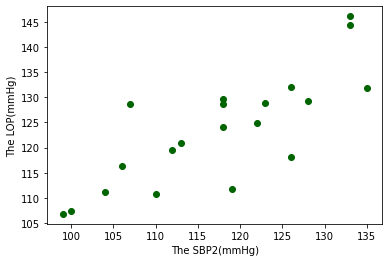

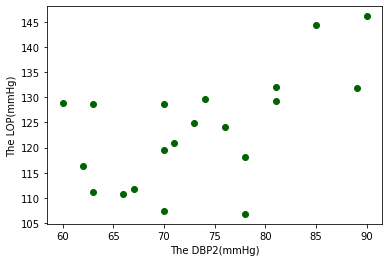

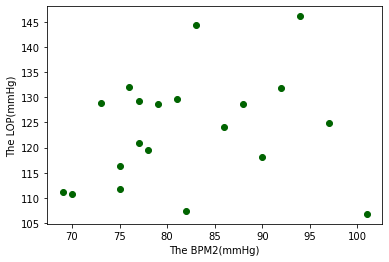

In [6]:
modTIP = TIP
#繪製散點圖,examDf.jt爲X軸，examDf.hk爲Y軸
plt.scatter(modTIP.SBP2,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
#添加圖的標籤（x軸，y軸）
plt.xlabel("The SBP2(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

plt.scatter(modTIP.DBP2,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The DBP2(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

plt.scatter(modTIP.BPM2,modTIP.LOP,color = 'darkgreen',label = "Exam Data")
plt.xlabel("The BPM2(mmHg)")#設置X軸標籤
plt.ylabel("The LOP(mmHg)")#設置Y軸標籤
plt.show()#顯示圖像

             SBP2       DBP2        BPM2         LOP
count   20.000000  20.000000   20.000000   20.000000
mean   117.500000  73.350000   82.150000  123.555000
std     10.942433   8.827439    9.033709   11.101184
min     99.000000  60.000000   69.000000  106.800000
25%    109.250000  66.750000   75.750000  115.175000
50%    118.000000  72.000000   80.000000  124.500000
75%    126.000000  78.750000   88.500000  129.375000
max    135.000000  90.000000  101.000000  146.100000
          SBP2      DBP2      BPM2       LOP
SBP2  1.000000  0.680278  0.172775  0.802316
DBP2  0.680278  1.000000  0.563609  0.576192
BPM2  0.172775  0.563609  1.000000  0.207532
LOP   0.802316  0.576192  0.207532  1.000000


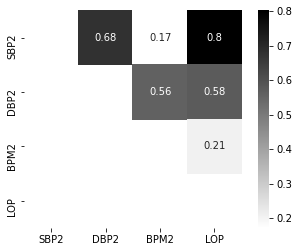

In [7]:
print(modTIP.describe())
rDf = modTIP.corr()#查看數據間的相關係數
print(rDf)

matrix = np.tril(rDf)
H = sns.heatmap(modTIP.corr(),annot=True, cmap="gray_r", square=True, mask=matrix)
F = H.get_figure()
# F.savefig('heatmap_colored_correlation_matrix_seaborn_python.png')

In [8]:
def t_test(group1, group2):
    mean1 = np.mean(group1)
    mean2 = np.mean(group2)
    std1 = np.std(group1)
    std2 = np.std(group2)
    nobs1 = len(group1)
    nobs2 = len(group2)
    
    modified_std1 = np.sqrt(np.float32(nobs1)/
                    np.float32(nobs1-1)) * std1
    modified_std2 = np.sqrt(np.float32(nobs2)/
                    np.float32(nobs2-1)) * std2
    (statistic, pvalue) = stats.ttest_ind_from_stats( 
               mean1=mean1, std1=modified_std1, nobs1=nobs1,   
               mean2=mean2, std2=modified_std2, nobs2=nobs2 )
    return statistic, pvalue

In [9]:
print(t_test(modTIP.SBP2, modTIP.LOP))

print(t_test(modTIP.DBP2, modTIP.LOP))

print(t_test(modTIP.BPM2, modTIP.LOP))

print(t_test(modTIP.LOP, modTIP.LOP))

(-1.7372008389883054, 0.09045218648648293)
(-15.830374710366224, 2.56125807206476e-18)
(-12.937667287208393, 1.6917599119006283e-15)
(0.0, 1.0)


MAE: 1.3755844044558714
最佳擬合線: LOP =  [30.51] + [0.79] * SBP2
R squared: 0.3827306273062738
MAE: 5.160305719921105
最佳擬合線: LOP =  [31.53] + [0.78] * SBP2
R squared: 0.5195548489666143
MAE: 11.400525910723445
最佳擬合線: LOP =  [11.31] + [0.96] * SBP2
R squared: -1.438896797153021
MAE: 3.871345514950164
最佳擬合線: LOP =  [29.44] + [0.8] * SBP2
R squared: -0.06717791411042229
MAE: 4.677743774549057
最佳擬合線: LOP =  [40.53] + [0.7] * SBP2
R squared: 0.5559081755940392
5-fold Mean MAE: 5.297101064919929


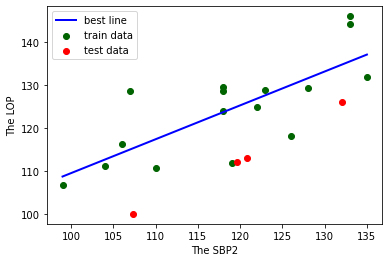

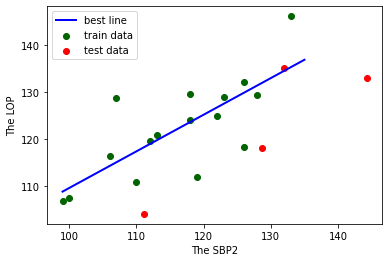

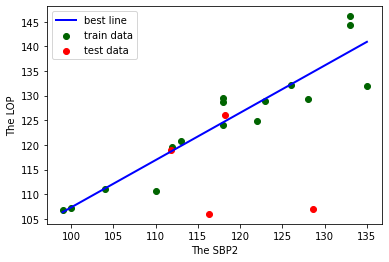

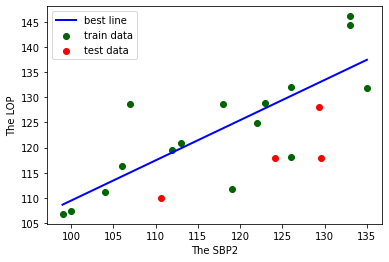

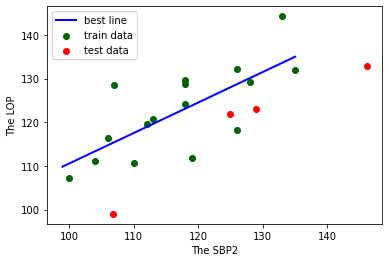

In [17]:
XX=modTIP.SBP2
YY=modTIP.LOP
qqq=np.array(XX)
qqq = np.reshape(qqq, (20,1))
qqqq=np.array(YY)
qqqq = np.reshape(qqqq, (20,1))
# cross_val_score(model, qqq, qqqq, cv=2)
# lr=LinearRegression()

# predicted = cross_val_predict(lr, qqq, qqqq, cv=5)
# fig, ax = plt.subplots()
# ax.scatter(qqqq, predicted)
# ax.plot([qqqq.min(), qqqq.max()], [qqqq.min(), qqqq.max()], 'k--', lw=4)
# ax.set_xlabel('Measured')
# ax.set_ylabel('Predicted')
# plt.show()
# seed = 7
kfold = model_selection.KFold(n_splits=5, shuffle=False)
s = []
for train, validate in kfold.split(qqq, qqqq):
    lrr = LinearRegression()
    lrr.fit(qqq[train], qqqq[train])
    #qqqq[validate]是ground truth
    #qqq[validate]是x_test
    s.append(mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    print("MAE:",mean_absolute_error(qqqq[validate], lrr.predict(qqq[validate])))
    plt.figure()
    a=lrr.intercept_
    b=lrr.coef_
    X1=np.linspace(qqq.min(),qqq.max(),18)
    Y1=np.round(a,2) + np.round(b[0],2) * X1
    print("最佳擬合線: LOP = ",np.round(a,2),"+",np.round(b[0],2),"* SBP2")
    plt.plot(X1, Y1, color='blue', linewidth=2, label="best line")
    plt.scatter(qqq[train], qqqq[train], color='darkgreen', label="train data")
    plt.scatter(qqqq[validate], qqq[validate], color='red', label="test data")
    plt.legend(loc=2)
    plt.xlabel("The SBP2")
    plt.ylabel("The LOP")
    print("R squared:",lrr.score(qqqq[validate],lrr.predict(qqq[validate])))#噴三個 R score
print("5-fold Mean MAE:",np.mean(s))#mse mean
# scoring = 'neg_mean_absolute_error'
# results = model_selection.cross_val_score(lrr, qqq, qqqq, cv=kfold, scoring=scoring)
# print("負的MAE",results.mean())

In [11]:
# print(predicted)

自變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)
因變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)


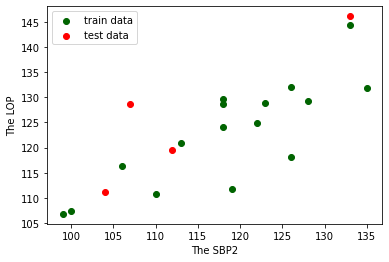

In [12]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train,X_test,Y_train,Y_test = train_test_split(modTIP.SBP2,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.SBP2.shape, "；  訓練集:",X_train.shape, "；  測試集:",X_test.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train.shape, "；  測試集:",Y_test.shape)
#散點圖
plt.scatter(X_train, Y_train, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test, Y_test, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBP2")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)
因變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)


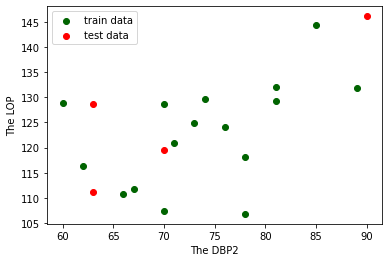

In [13]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(modTIP.DBP2,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.DBP2.shape, "；  訓練集:",X_train2.shape, "；  測試集:",X_test2.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train2.shape, "；  測試集:",Y_test2.shape)
#散點圖
plt.scatter(X_train2, Y_train2, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test2, Y_test2, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The DBP2")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

自變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)
因變量---源數據: (20,) ；  訓練集: (16,) ；  測試集: (4,)


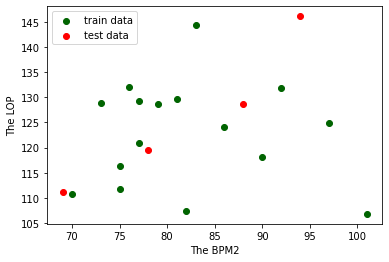

In [14]:
#拆分訓練集和測試集（train_test_split是存在與sklearn中的函數）
X_train3,X_test3,Y_train3,Y_test3 = train_test_split(modTIP.BPM2,modTIP.LOP,train_size=0.8,random_state=1)
#train爲訓練數據,test爲測試數據,examDf爲源數據,train_size 規定了訓練數據的佔比
print("自變量---源數據:",modTIP.BPM2.shape, "；  訓練集:",X_train3.shape, "；  測試集:",X_test3.shape)
print("因變量---源數據:",modTIP.LOP.shape, "；  訓練集:",Y_train3.shape, "；  測試集:",Y_test3.shape)
#散點圖
plt.scatter(X_train3, Y_train3, color="darkgreen", label="train data")#訓練集爲深綠色點
plt.scatter(X_test3, Y_test3, color="red", label="test data")#測試集爲紅色點
#添加標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The BPM2")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示散點圖

In [15]:
q = np.array(X_train)#q原先shape是(28,0)
np.shape(q)
q = np.reshape(q, (16,1))#reshape換成(28,1)
qq = np.array(X_test)
qq = np.reshape(qq, (4,1))

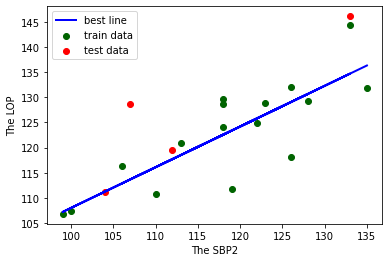

擬合參數:截距 27.0863656420061 ,迴歸係數： [0.80903809]
最佳擬合線: LOP =  27.09 + 0.81 * SBP2
0.682895244556221
7.0964553610825085


In [16]:
model = LinearRegression()
model.fit(q,Y_train)#調用線性迴歸包
# model.fit(X_train,Y_train)
a  = model.intercept_#截距
b = model.coef_#迴歸係數
#訓練數據的預測值
y_train = model.predict(q)#看原本線性
y_train_pred = model.predict(qq)#預測y
#繪製最佳擬合線：標籤用的是訓練數據的預測值y_train_pred
plt.plot(q, y_train, color='blue', linewidth=2, label="best line")
#測試數據散點圖
plt.scatter(X_train, Y_train, color='darkgreen', label="train data")
plt.scatter(X_test, Y_test, color='red', label="test data")
#添加圖標標籤
plt.legend(loc=2)#圖標位於左上角，即第2象限，類似的，1爲右上角，3爲左下角，4爲右下角
plt.xlabel("The SBP2")#添加 X 軸名稱
plt.ylabel("The LOP")#添加 Y 軸名稱
plt.show()#顯示圖像
print("擬合參數:截距",a,",迴歸係數：",b)
print("最佳擬合線: LOP = ",round(a,2),"+",round(b[0],2),"* SBP2")
#顯示線性方程，並限制參數的小數位爲兩位
print(model.score(q,Y_train))#R score
print(mean_absolute_error(Y_test,y_train_pred))